In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

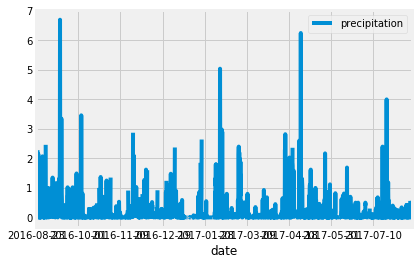

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
#print(df)

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
#print(df)

#  print the DataFrame without the index
#print(df.to_string(index=False))

#print the sorted list without the index
#print(df.to_string(index=False))


# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded,  highest temperature recorded,  
#average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


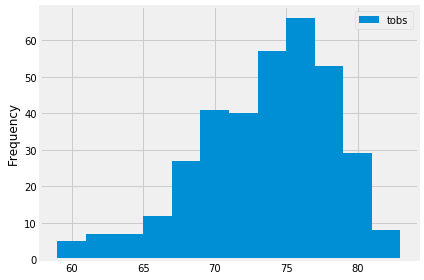

In [15]:
# Choose the station with the highest number of temperature observations.

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
print(df)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df.plot.hist(bins=12)
plt.tight_layout()

In [16]:
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


#CHALLENGE


In [84]:
#print July_results

from sqlalchemy import extract  
date1='2017-07-01'
date2='2017-07-31'
July_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date1).filter(Measurement.date <= date2).group_by(Measurement.date).all()
#print(July_results)


# Perform a query to retrieve the data and precipitation scores
#July_results = []
#July_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date == dates).all()
#print(July_results)

# Save the query results as a Pandas DataFrame and set the index to the date column
July_df = pd.DataFrame(July_results, columns=['Date','July Precipitation'])
print(July_df)

# Use Pandas to calcualte the summary statistics for the precipitation data
July_df.describe()





          Date  July Precipitation
0   2017-07-01                0.02
1   2017-07-02                0.02
2   2017-07-03                0.04
3   2017-07-04                0.04
4   2017-07-05                0.00
5   2017-07-06                0.00
6   2017-07-07                0.00
7   2017-07-08                0.00
8   2017-07-09                0.00
9   2017-07-10                0.00
10  2017-07-11                0.00
11  2017-07-12                0.00
12  2017-07-13                0.07
13  2017-07-14                0.02
14  2017-07-15                0.00
15  2017-07-16                0.02
16  2017-07-17                0.03
17  2017-07-18                0.05
18  2017-07-19                0.00
19  2017-07-20                0.03
20  2017-07-21                0.00
21  2017-07-22                0.03
22  2017-07-23                0.00
23  2017-07-24                0.05
24  2017-07-25                0.00
25  2017-07-26                0.00
26  2017-07-27                0.00
27  2017-07-28      

,July Precipitation
count,31.000000
mean,0.013548
std,0.019757
min,0.000000
25%,0.000000
50%,0.000000
75%,0.025000
max,0.070000


In [85]:
# Use Pandas to calcualte the summary statistics for the precipitation data
July_df.describe()

,July Precipitation
count,31.000000
mean,0.013548
std,0.019757
min,0.000000
25%,0.000000
50%,0.000000
75%,0.025000
max,0.070000


Gathering December Data 

In [86]:
#print December _results

from sqlalchemy import extract  
Ddate1='2016-12-01'
Ddate2='2016-12-31'
Dec_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Ddate1).filter(Measurement.date <= Ddate2).group_by(Measurement.date).all()
#print(Dec_results)




# Save the query results as a Pandas DataFrame and set the index to the date column
Dec_df = pd.DataFrame(Dec_results, columns=['Date','Dec Precipitation'])
print(Dec_df)



          Date  Dec Precipitation
0   2016-12-01               0.12
1   2016-12-02               0.03
2   2016-12-03               0.00
3   2016-12-04               0.03
4   2016-12-05               0.43
5   2016-12-06               0.02
6   2016-12-07               0.00
7   2016-12-08               0.03
8   2016-12-09               0.52
9   2016-12-10               0.05
10  2016-12-11               0.04
11  2016-12-12               0.01
12  2016-12-13               0.05
13  2016-12-14               0.03
14  2016-12-15               0.00
15  2016-12-16               0.00
16  2016-12-17               0.01
17  2016-12-18               0.13
18  2016-12-19               0.01
19  2016-12-20               0.00
20  2016-12-21               0.00
21  2016-12-22               0.01
22  2016-12-23               0.01
23  2016-12-24               0.01
24  2016-12-25               0.00
25  2016-12-26               0.02
26  2016-12-27               0.00
27  2016-12-28               0.02
28  2016-12-29

In [87]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Dec_df.describe()

,Dec Precipitation
count,31.000000
mean,0.056452
std,0.117744
min,0.000000
25%,0.005000
50%,0.020000
75%,0.040000
max,0.520000


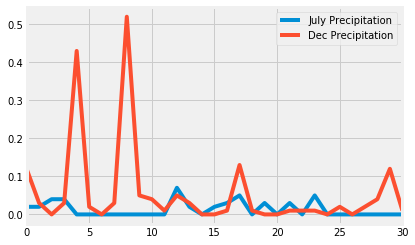

In [90]:
ax = July_df.plot()

Dec_df.plot(ax=ax)